# Pull Request Effect

バグ混入にプルリクエストが影響するかを調査する．

## PR と bug の数

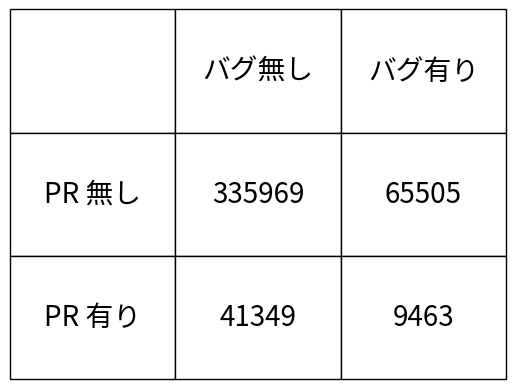

#+pr+bi/#+pr = 18.62%
#-pr+bi/#-pr = 16.32%


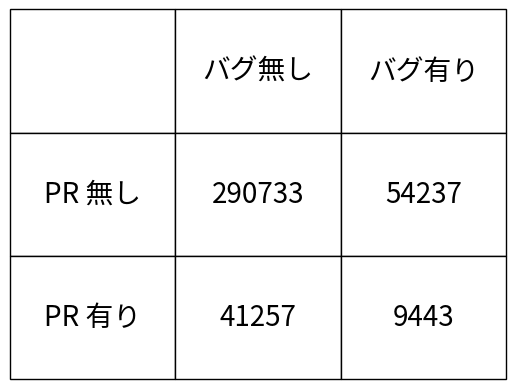

#+pr+bi/#+pr = 18.63%
#-pr+bi/#-pr = 15.72%


In [ ]:
import matplotlib.pyplot as plt
import polars as pl

df = pl.read_csv("data/pull_request_impact.csv")

# 合計値
sum_dict = {
    "#+pr+bi": df["#+pr+bi"].sum(),
    "#+pr-bi": df["#+pr-bi"].sum(),
    "#-pr+bi": df["#-pr+bi"].sum(),
    "#-pr-bi": df["#-pr-bi"].sum(),
    "#+pr": df["#+pr+bi"].sum() + df["#+pr-bi"].sum(),
    "#-pr": df["#-pr+bi"].sum() + df["#-pr-bi"].sum(),
    "#+bi": df["#+pr+bi"].sum() + df["#-pr+bi"].sum(),
    "#-bi": df["#+pr-bi"].sum() + df["#-pr-bi"].sum(),
}

plt.rc("font", family="Noto Sans CJK JP")
plt.table(
    cellText=[
        ["", "バグ無し", "バグ有り"],
        ["PR 無し", sum_dict["#-pr-bi"], sum_dict["#-pr+bi"]],
        ["PR 有り", sum_dict["#+pr-bi"], sum_dict["#+pr+bi"]],
    ],
    loc="center",
    cellLoc="center",
    bbox=[0, 0, 1, 1],
)

plt.axis("off")
plt.show()

# 割合
print(f"#+pr+bi/#+pr = {sum_dict['#+pr+bi'] / sum_dict['#+pr']:.2%}")
print(f"#-pr+bi/#-pr = {sum_dict['#-pr+bi'] / sum_dict['#-pr']:.2%}")

# プルリクエスト数が 20 以下のプロジェクトを除外
# 合計値
filtered_df = df.filter(df["#pr"] > 20)
sum_dict = {
    "#+pr+bi": filtered_df["#+pr+bi"].sum(),
    "#+pr-bi": filtered_df["#+pr-bi"].sum(),
    "#-pr+bi": filtered_df["#-pr+bi"].sum(),
    "#-pr-bi": filtered_df["#-pr-bi"].sum(),
    "#+pr": filtered_df["#+pr+bi"].sum() + filtered_df["#+pr-bi"].sum(),
    "#-pr": filtered_df["#-pr+bi"].sum() + filtered_df["#-pr-bi"].sum(),
    "#+bi": filtered_df["#+pr+bi"].sum() + filtered_df["#-pr+bi"].sum(),
    "#-bi": filtered_df["#+pr-bi"].sum() + filtered_df["#-pr-bi"].sum(),
}

plt.rc("font", family="Noto Sans CJK JP")
plt.table(
    cellText=[
        ["", "バグ無し", "バグ有り"],
        ["PR 無し", sum_dict["#-pr-bi"], sum_dict["#-pr+bi"]],
        ["PR 有り", sum_dict["#+pr-bi"], sum_dict["#+pr+bi"]],
    ],
    loc="center",
    cellLoc="center",
    bbox=[0, 0, 1, 1],
)
plt.axis("off")
plt.show()

# 割合
print(f"#+pr+bi/#+pr = {sum_dict['#+pr+bi'] / sum_dict['#+pr']:.2%}")
print(f"#-pr+bi/#-pr = {sum_dict['#-pr+bi'] / sum_dict['#-pr']:.2%}")

## PR と bug の箱ひげ図

shape: (98,)
Series: 'bug_rate_+pr' [f64]
[
	0.10566
	0.097222
	0.108696
	0.15942
	0.216867
	…
	0.061404
	null
	0.441429
	0.015147
	null
]


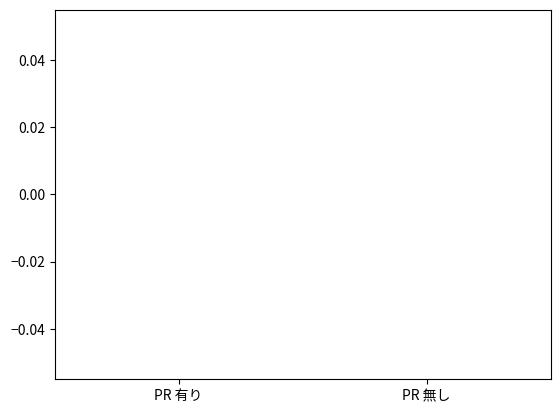

In [18]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

df = pl.read_csv("data/pull_request_impact.csv")

# 各プロジェクトに対して, バグの割合の列を追加
df = df.with_columns(
    [
        (pl.col("#+pr+bi") / (pl.col("#+pr+bi") + pl.col("#+pr-bi"))).alias(
            "bug_rate_+pr"
        ),
        (pl.col("#-pr+bi") / (pl.col("#-pr+bi") + pl.col("#-pr-bi"))).alias(
            "bug_rate_-pr"
        ),
    ]
)

# プロジェクトごとのバグ割合を箱ひげ図で表示
plt.rc("font", family="Noto Sans CJK JP")
plt.boxplot(
    [df["bug_rate_+pr"]., df["bug_rate_-pr"]], tick_labels=["PR 有り", "PR 無し"]
)
plt.show()

In [23]:
df = pl.read_csv("data/pull_request_impact.csv")
df = df.fill_null(strategy="zero")
display(df)
df.write_csv("data/0.csv")

project,#pr,#mpr,#+pr+bi,#+pr-bi,#-pr+bi,#-pr-bi
str,i64,i64,i64,i64,i64,i64
"""commons-rdf""",56,37,28,237,27,1019
"""ant-ivy""",81,28,7,65,662,2455
"""commons-math""",160,39,5,41,883,6293
"""mahout""",409,65,44,232,1238,2653
"""opennlp""",389,184,18,65,444,2158
…,…,…,…,…,…,…
"""sis""",23,10,7,107,579,6831
"""uima-ducc""",6,0,null,5,1748,3265
"""avro""",1379,854,309,391,944,1144


In [36]:
import os

import polars as pl
from mongoengine import connect
from pycoshark.mongomodels import (
    Commit,
    FileAction,
    Project,
    PullRequest,
    PullRequestComment,
    PullRequestCommit,
    PullRequestSystem,
    VCSSystem,
)
from pycoshark.utils import create_mongodb_uri_string
from pymongo.command_cursor import CommandCursor

# データベースに接続
uri = create_mongodb_uri_string(
    db_user=os.getenv("SMARTSHARK_DB_USERNAME"),
    db_password=os.getenv("SMARTSHARK_DB_PASSWORD"),
    db_hostname=os.getenv("SMARTSHARK_DB_HOST"),
    db_port=os.getenv("SMARTSHARK_DB_PORT"),
    db_authentication_database=os.getenv("SMARTSHARK_DB_AUTHENTICATION_DATABASE"),
    db_ssl_enabled=False,
)
connect(
    db=os.getenv("SMARTSHARK_DB_DATABASE"),
    host=uri,
)

project = Project.objects(name="ant-ivy").only().first()
project is None
# df = pl.read_csv("data/pull_request_impact.csv")
# new_df = pl.DataFrame()

# for row in df.iter_rows(named=True):
#     project = Project.objects(name=row["project"]).first()
#     vcs_system = VCSSystem.objects(project_id=project.id).first()
#     pr_system = PullRequestSystem.objects(project_id=project.id).first()

#     new_df = new_df.vstack(
#         pl.DataFrame(
#             {
#                 "project": row["project"],
#                 "#pr": PullRequest.objects(pull_request_system_id=pr_system.id).count(),
#                 "#mpr": PullRequest.objects(
#                     pull_request_system_id=pr_system.id, merged_at__exists=True
#                 ).count(),
#                 "#+pr+bi": row["#+pr+bi"],
#                 "#+pr-bi": row["#+pr-bi"],
#                 "#-pr+bi": row["#-pr+bi"],
#                 "#-pr-bi": row["#-pr-bi"],
#             },
#         )
#     )


# new_df.write_csv("a.csv")

False